# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import pylab
import seaborn as sns
import statsmodels.api as sm

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

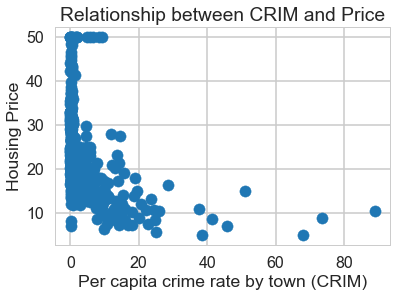

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

###  Describe relationship 
* There seems to be a negative relationshp - as the crime rate increases, the housing price goes down.  However, the relationship does not seem to be linear because the shape of data points is 'L'-shape rather than a straight line. 
* Areas with the housing price of over 30000 dollars have low crime rates, and locals with the crime rate of over 20 have quite low housing price. However, interestingly, some of the most expensive areas have relatively high crime rates shown on the top tail on the plot.
* From the pearson's correlation coefficient of -0.39 we can say that these two variables have a weak anti-correlation.  To improve the linear relationship, we apply logarithm to the housing price, and it results a better correlation coefficient of -0.53.  Histograms of the joint plot shows that the distribution of CRIM has extremely long right-tail and that of the log(PRICE) has long left-tail and thick right-tail.   
* Boxplots also show that a large number of outliers on the right-hand side of crime rate and both sides of housing price

In [13]:
# Call numpy corrcoef function to check the pearson correlation coefficient
np.corrcoef(bos.CRIM, bos.PRICE)

array([[ 1.        , -0.38583169],
       [-0.38583169,  1.        ]])

In [14]:
# Do it again with applying log to housing price
np.corrcoef(bos.CRIM, np.log(bos.PRICE))

array([[ 1.        , -0.52504701],
       [-0.52504701,  1.        ]])

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


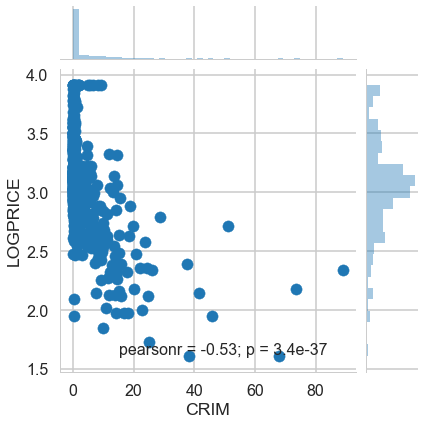

In [15]:
# Check the plot
bos['LOGPRICE'] = np.log(bos.PRICE)
sns.jointplot(x = 'CRIM', y = 'LOGPRICE', data = bos)
plt.show()

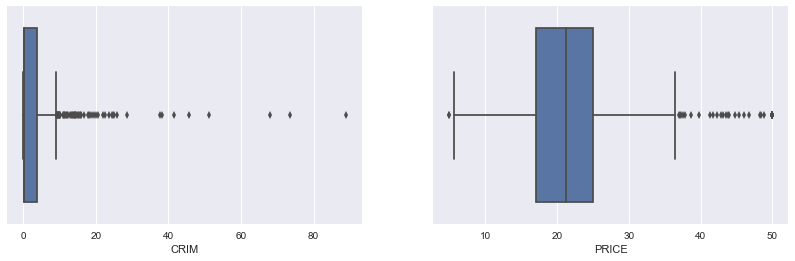

In [16]:
# Boxplots
sns.set()
f, axes = plt.subplots(1, 2, figsize = (14, 4))

sns.boxplot(x = bos.CRIM, ax = axes[0])
sns.boxplot(x = bos.PRICE, ax = axes[1])
plt.show()

### Scatter plot between *RM* and *PRICE*

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


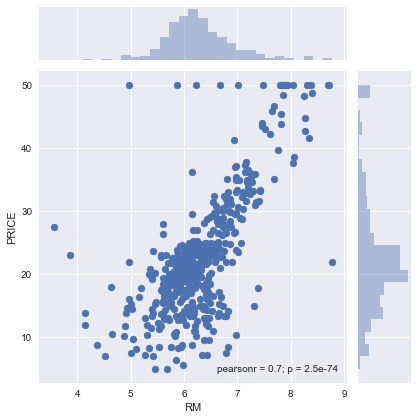

In [17]:
# Joint plot
sns.jointplot(x = 'RM', y = 'PRICE', data = bos)
plt.show()

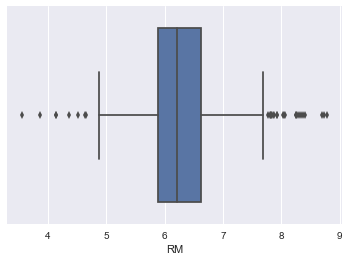

In [18]:
# Boxplot
sns.boxplot(x = bos.RM)
plt.show()

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


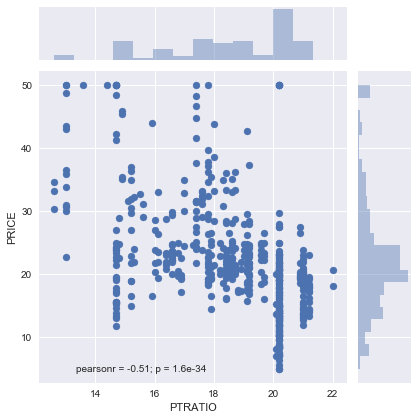

In [19]:
# Joint plot
sns.jointplot(x = 'PTRATIO', y = 'PRICE', data = bos)
plt.show()

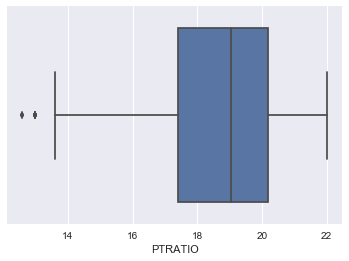

In [20]:
# Boxplot
sns.boxplot(x = bos.PTRATIO)
plt.show()

Average rooms of dwelling have a moderately strong positive correlation with the housing price, having the correlation coefficient of 0.7.  Distribution of the number of rooms seems to close to the bell-shape yet with a longer tails, almost symmetric, and so the medean and mean have the same value of 6.2. Boxplot shows that there are a number of extreme values on both sides of whiskers, agreeing with the long tails in the histogram.

Pupil-teacher ratio has a medium level of negative correlation with the housing price, getting the correlation coefficient of -0.51. Distribution of this variable has a long left-tail, which implies the mean value is affected by those smaller values and resulting 18.5, whilst the median is 19.1.  Boxplot shows also a few outliers on the left-hand side of the whisker.

# Describe relationship: NOX and LSTAT 
Nitrogen oxides are at least partially responsible for several types of air pollution. I consider this environmental issue as one factor of the housing price.  I also assume that the percentage of lower status of population could affect the housing price. So, I would like to ivestigate these two variables regarding the relationship with the housing price.

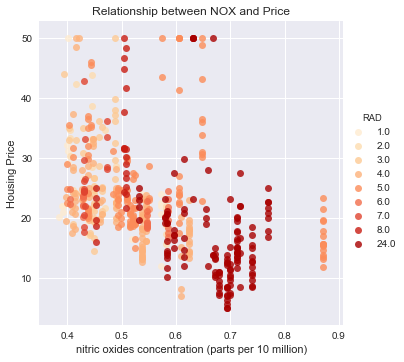

In [21]:
# I am interested in revealing that the environmental condition might affect to the house price
# at a same time, see the difference of the price depending on the accessibility to radial highways
sns.lmplot(x = 'NOX', y = 'PRICE', hue = 'RAD', palette = 'OrRd', 
                data = bos, fit_reg = False)
plt.xlabel("nitric oxides concentration (parts per 10 million)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")
plt.show()

In [22]:
# Pearson's correlation coefficient of NOX and PRICE
np.corrcoef(bos.NOX, bos.PRICE)[0,1]

-0.42732077237328264

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


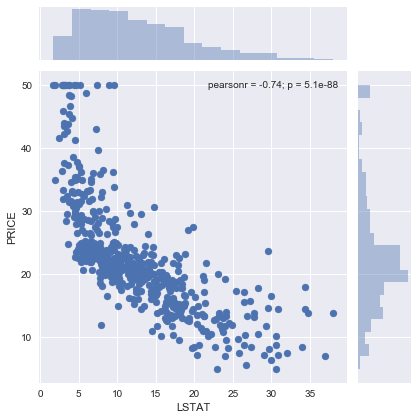

In [23]:
# Joint plot
sns.jointplot(x = 'LSTAT', y = 'PRICE', data = bos)
plt.show()

In the first scatterplot, we added the hue for index of accessibility to radial highways to see any differences among the thes indeces at the same time of showing the linear relationship between the nitric oxides concentration (parts per 10 million)and the housing price. There is not a strong association, but a weak one with the coefficient of -0.43; the hue does not represent any clear distinction among levels in the housing price.

On the other hand, the percentage of lower status of population has a stronger correlation with the housing price,having the coefficient of -0.74; it clearly shows that as the percentage of lower status increses, the house prces goes down.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


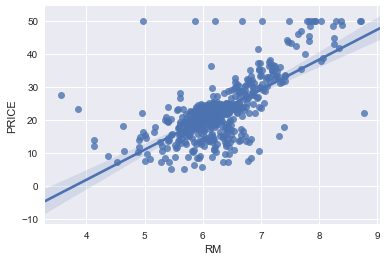

In [24]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


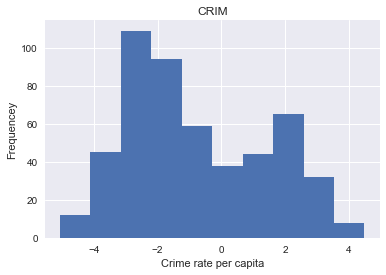

In [25]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

### Application of logarithm

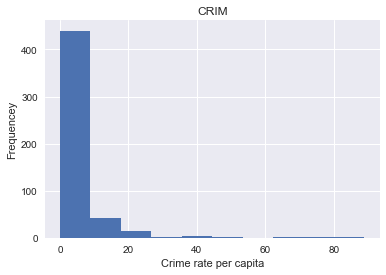

In [26]:
# Histogram without transformation
plt.hist(bos.CRIM)
plt.title("CRIM")# your turn
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Almost 90% of data are belong to the first bin that represents less than ten per capita crimial rate, and the remainder 10% of data spread out up to 90 criminal rate.  It means that we hardly see the the whole story of the data.  Taking the transformation with log, we have a clearer view of distribution showing the bimodal with the highest pick at the bin of about (-3, -2) and the second pick at the bin of around (2, 3).  Cpamaring to the frequency of over 400 for the first bin without transformation, the maximum frequncy is approximately 110 after transfomation.

### Correlations in predictors

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


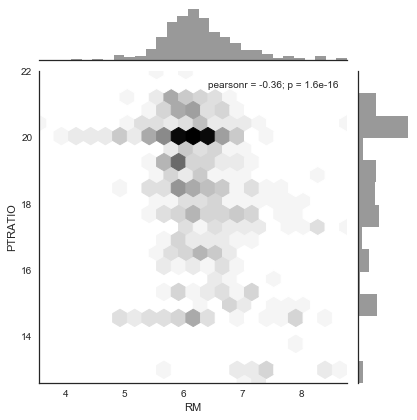

In [27]:
# Joint plot
with sns.axes_style("white"):
    sns.jointplot(x = 'RM', y = 'PTRATIO', data = bos, kind="hex", color="k");

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


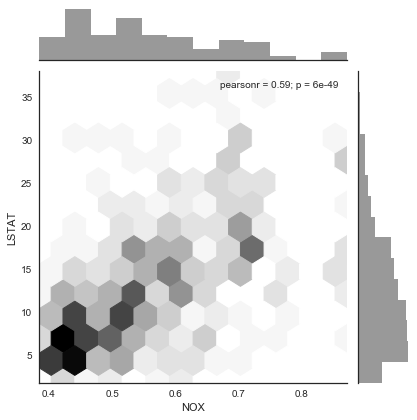

In [28]:
# Joint plot
with sns.axes_style("white"):
    sns.jointplot(x = 'NOX', y = 'LSTAT', data = bos, kind="hex", color="k");

The average number of rooms per dwelling and pupil-teacher ratio by town have not a significant correlation with the value of -0.36.  However the nitric oxides concentration and percentage of lower status have a stronger correlation with the vlaue of 0.59.  If the correlation between any two predictors is too high, it can cause a modelling problem - creat an unreliable model, such as too high parameter estimates.  Though we do not consider 0.59 too high to build a good model, it is better to check all the correlation values.  From the matrix and heatmap of the correlations below, we can see some variables have strong correlations each other, for example 'TAX' and 'RAD' with 0.91.

In [29]:
# Correlation matrix of predictor variables
corr = bos.drop('PRICE', axis = 1).corr()
round(corr, 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LOGPRICE
CRIM,1.00,-0.20,0.40,-0.06,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.53
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.54
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.16
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.51
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.63
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.45
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.34
RAD,0.62,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.48
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.56


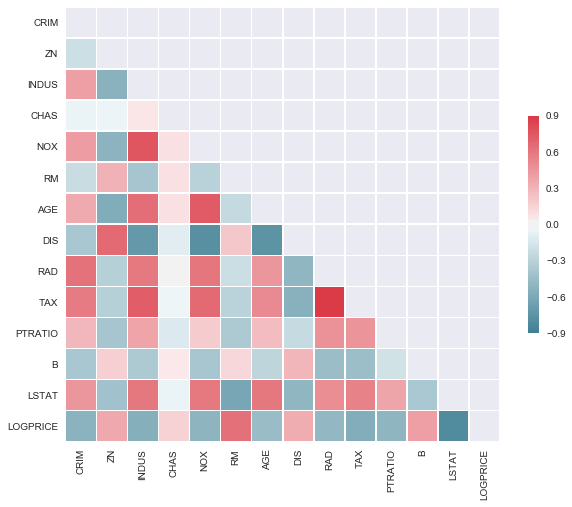

In [30]:
# Plot heatmap
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib plane
f, ax = plt.subplots(figsize = (10, 8))

# Customise a diversing colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -0.9, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.margins(.02)
#plt.savefig('corr_predictors.png')
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [31]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.49e-74
Time:                        07:50:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

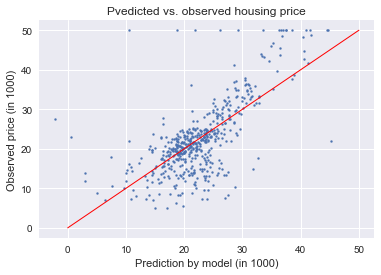

In [33]:
# Scatter plot 
plt.scatter(m.fittedvalues, bos.PRICE, s = 4)
plt.plot([0, 50], [0, 50], color = 'r', linestyle = '-', linewidth =1)
plt.xlabel('Prediction by model (in 1000)')
plt.ylabel('Observed price (in 1000)')
plt.title('Pvedicted vs. observed housing price')
plt.show()

In [34]:
# Look at the negative predition
preds = m.fittedvalues
print('Negative vlaue of the housing price in prediction: ', preds[preds < 0])

Negative vlaue of the housing price in prediction:  365   -2.258011
dtype: float64


The red-line in the plot implies the the ideal scenario with perfect matching in the observarion and predinction. Of course, in the real-world problem, most of the data sit on the outside of the line; points on the lower-right mean higher prediction values than actual price (over-fitting), whilst points on the upper-left represent lower predictions (under-fitting).  Interestingly, some most highest values of the housing prices were not catured by the model - the predicion of those prices are way too low as (10000, 30000). Furthermore, we can see one data point on the negative-side of prediation value with the predition of -2.258, which is interpreted as someone buys that house will receive the extra 2258 dollars instead of any pay.

### Fitting Linear Regression using `sklearn`


In [35]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
y = bos.PRICE

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [36]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In the initial linear model withe 13 predictors and intercept as well, the prrameter estimate of the intercept 36.491 can be interpreted as the estimated housing price is 36491 dollars when the all of the 13 variables are zeros.  It is resonable in the sense of the price itself - though in the sense of predictors, it is impractical that the full-value property-tax rate per $10000 is zero, for example.

The scatter plot of the residuals does not well present that data are independently and identically distributed.  Also the density plot confirms that the distribution of data is not excatly normal.  We check the empirical cumulative density values for the residuals and conclude that the residuals have some distance from the normal distribution as displayed below.

To use linear regression, Y does not need to be normally distributed. The assumption of the linear model is satisfying that the residuals are normally distributed.  This means that the error values from the linear model prediction should be normally distributed.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [37]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -54.45726623382359


In [38]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 14


In [39]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,0.119041
1,ZN,0.020458
2,INDUS,-0.034396
3,CHAS,0.450185
4,NOX,-0.486472
5,RM,1.803356
6,AGE,-0.004040
7,DIS,-0.387560
8,RAD,-0.009823
9,TAX,0.001524


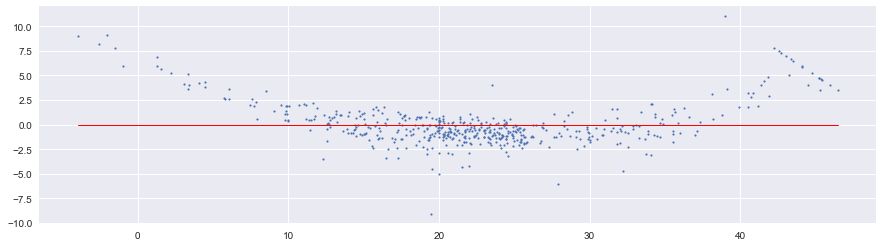

In [40]:
# Prediction an dresidual
preds = lm.predict(X)
residuals = y - preds

# Set up the matplotlib plane
f, ax = plt.subplots(figsize = (15, 4))

plt.scatter(preds, residuals, s = 3)
plt.plot([np.min(preds), np.max(preds)], [0, 0], color = 'r', linewidth = 1)
plt.show()

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


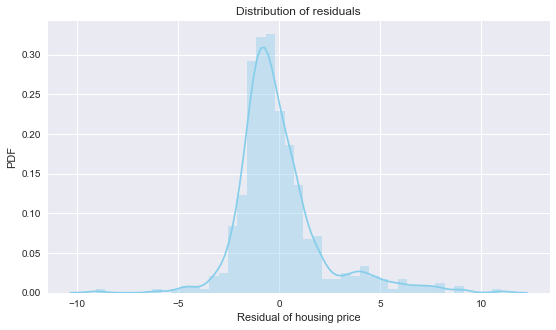

In [41]:
# Density plot of residuals
f, axes = plt.subplots(figsize=(9, 5))
sns.distplot(residuals, color = 'skyblue')
plt.xlabel('Residual of housing price')
plt.ylabel('PDF')
plt.title('Distribution of residuals')
plt.show()

In [42]:
# Function for Empirical Cummulative Distribution Function (ECDF)
def ecdf(col):
    import numpy as np
    x = np.sort(col)
    y = np.arange(1, len(x) + 1) / len(x)
    return(x, y)

In [43]:
# Randon sample with mean and standard deviation from df
mean = np.mean(residuals)
std = np.std(residuals)
np.random.seed(2018)
samples = np.random.normal(mean, std, size = 10000)

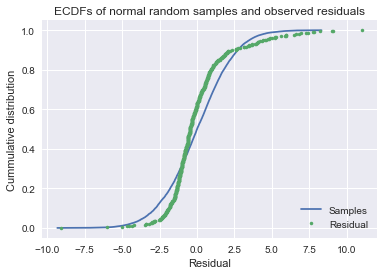

In [44]:
# ECDFs from df and samples --> plots using the defualt seaborn setting
x, y = ecdf(residuals)
x_theor, y_theor = ecdf(samples)

sns.set()
_ = plt.plot(x_theor, y_theor, label = 'Samples')
_ = plt.plot(x, y, marker = '.', linestyle = 'none', label = 'Residual')
_ = plt.xlabel('Residual')
_ = plt.ylabel('Cummulative distribution')
_ = plt.title('ECDFs of normal random samples and observed residuals')
_ = plt.legend(loc = 'lower right')
plt.show()

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [45]:
# first five predicted prices
lm.predict(X)[0:5]

array([25.45443119, 22.09497315, 33.4374477 , 31.80210044, 34.10971452])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

The histogram and density plot show that the prediction values have a mod, and the peak is posited at the quite centre; and the spread of the values are balanced on both sides of the center value.  There are some outliers on both sides including a negative housing price - it might be caused by high dimension of predictors of 13, especially with strong correlations between predictors. We can adjust (reduce) the number of predictors and check its results - could be better or worse.

There is a still a negative prediction as the same as the prediction from statsmodels earlier, but the under-estimated values for some most expensive housing prices are improved - the points of the most top are shown at the quite right side (greated than 20) comparing the plot of statsmodels.

One advantage of statsmodels is providing symmary of model fitting in a very tidy and clean format.  We can easily learn all information about the parameter estimates, standard errors, 95% confidence intervals and residuals from the summary output.

C:\Users\dpark\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


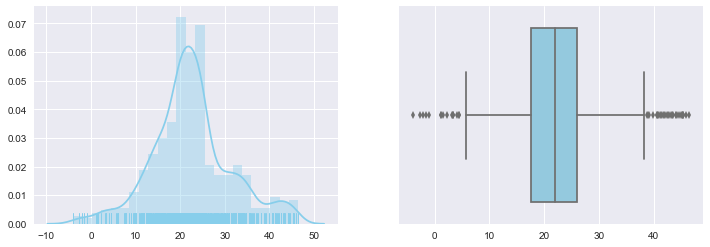

In [46]:
# Predict values
preds = pd.DataFrame(lm.predict(X))
f, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.distplot(preds, color = 'skyblue', ax = axes[0], rug = True)
sns.boxplot(preds, color = 'skyblue', ax = axes[1])
plt.show()

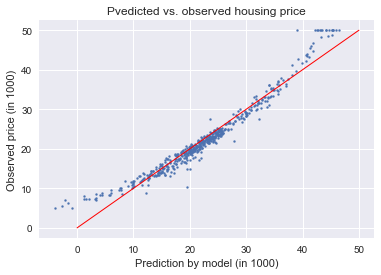

In [47]:
# Scatter plot 
plt.scatter(preds, bos.PRICE, s = 4)
plt.plot([0, 50], [0, 50], color = 'r', linestyle = '-', linewidth =1)
plt.xlabel('Prediction by model (in 1000)')
plt.ylabel('Observed price (in 1000)')
plt.title('Pvedicted vs. observed housing price')
plt.show()

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [51]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

2366.1766007484725


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [52]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

40350.11881427115


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

We can compare the summary outputs from the linear model using statsmodels module and the other one using scikit-learn.  Both R^2 values are same as 0.258, so F-statistics from two models agree each other as 175.1.  The results tell us the parameter estimate is significant as the p-values are small enough, approximatly close to zero.  From t-statistics result in OLS model summary table, we can see that the p-value for the PTRATIO parameter estimate is the same as the p-value of F-statistic.

In [48]:
# Model fitting of PRICE using statsmodel
m = ols('PRICE ~ PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.61e-34
Time:                        07:51:37   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [49]:
# Model fitting of PRICE using scilit-learn
X = pd.DataFrame(bos.PTRATIO)
y = bos.PRICE

lm = LinearRegression()
lm.fit(X, y)
print('Intercept estimate: {}'.format(lm.intercept_),
      '\nParameter estimate: {}'.format(lm.coef_[0]))

Intercept estimate: 62.34462747483266 
Parameter estimate: -2.1571752960609656


In [50]:
# Compute R^2
rss = np.sum((bos.PRICE - m.predict(X)) ** 2)
ess = np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)
r2 = ess / (rss + ess)
print('R^2: {}'.format(r2))

R^2: 0.2578473180092229


In [51]:
# Compute F statistic 
n = len(bos.PRICE)
k = len(X.columns)
f = (r2 / (1 - r2)) * ((n - k - 1) / k)
print('F-statistic: {}'.format(f))

F-statistic: 175.10554287569536


In [52]:
# p-value form F-statistic
print('P-value: {}'.format((1 - stats.f.cdf(f, k, n - k))))

P-value: 1.1102230246251565e-16


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

The linear model using three variables, CRIM, RM and PTRATIO, for predicting the housing price has better fit with R_squared of 0.592.  The big change is the intecept estimate of -3.307, implying the housing price starts from -3307dollars when the three variables are all zeros.

The most significant parameter estimate for predicting the housing price seems to be the average number of rooms for dwelling since the estimated parameter of 7.382 represents that one extra room leads increase of the housing price by 7382 dollars. The pupil-teacher ratio by town also seems to be a good predictor in reverse way, showing as the unit decreasing in the pupil-teacher ratio leads the price increasing by 1074 dollars.

In [53]:
# Fit a model using statsmodels
m = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.09e-97
Time:                        07:52:00   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

In [54]:
# Fit a model using scikit-learn
X = bos[['CRIM', 'RM', 'PTRATIO']]
y = bos.PRICE

lm = LinearRegression()
lm.fit(X, y)
print('Intercept estimate: {}'.format(lm.intercept_),
      '\nParameter estimate: {}'.format(lm.coef_))

Intercept estimate: -3.3066171324064975 
Parameter estimate: [-0.20210971  7.3815667  -1.0741868 ]


In [55]:
# Compute R^2
rss = np.sum((y - m.predict(X)) ** 2)
ess = np.sum((lm.predict(X) - np.mean(y)) ** 2)
r2 = ess / (rss + ess)
print('R^2: {}'.format(r2))

R^2: 0.5934141551136974


In [56]:
# Compute F statistic 
n = len(bos.PRICE)
k = len(X.columns)
f = (r2 / (1 - r2)) * ((n - k - 1) / k)
print('F-statistic: {}'.format(f))

F-statistic: 244.22387023858724


In [57]:
# p-value form F-statistic
print('P-value: {}'.format((1 - stats.f.cdf(f, k, n - k))))

P-value: 1.1102230246251565e-16


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [58]:
# Fit a model using statsmodels
m = ols('PRICE ~ CRIM + RM + PTRATIO + TAX + LSTAT', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 20 Aug 2018   Prob (F-statistic):          1.01e-121
Time:                        07:53:04   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.8049      3.998      4.203      0.0

According to these two model comparison in the aspect of AIC, we can say that the second model with five predictors seems to have a better fit than the other; the five-predictor model has the AIC value of 3114, while the three-predictor model has the AIC of 3233. However, we doubt about the sinificance of the variable TAX since its eatimate of -0.0009 is close to zero, and the 95% confidnece interval and p-value also tell us the estimate is not reliable.  So we just remove this variable and look at the change of AIC as shown below.  After taking off the insignificant predictor, TAX, our model has a smaller AIC value of 3112, which decreased by 2 from the five-predictor model.

In [60]:
# Fit a model using statsmodels
m = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Mon, 20 Aug 2018   Prob (F-statistic):          6.39e-123
Time:                        07:56:29   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.0


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

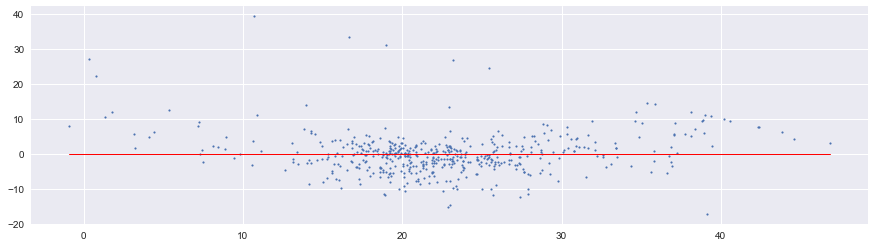

In [61]:
# Fit a model using scikit-learn
X = bos[['CRIM', 'RM', 'PTRATIO']]
y = bos.PRICE

lm = LinearRegression()
lm.fit(X, y)

# Residual plot
preds = lm.predict(X)
residuals = y - preds

# Set up the matplotlib plane
f, ax = plt.subplots(figsize = (15, 4))

plt.scatter(preds, residuals, s = 3)
plt.plot([np.min(preds), np.max(preds)], [0, 0], color = 'r', linewidth = 1)
plt.show()

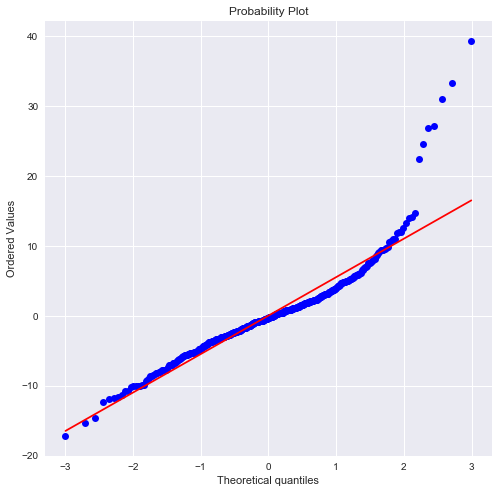

In [62]:
# Quantile plot of residuals
f, ax = plt.subplots(figsize = (8, 8))
stats.probplot(residuals, dist = 'norm', plot = pylab)
plt.show()

The scatter plot of prediction vs. residual shows a clear view of comparison for each data point - for example, there are patterns in both tails of plot. We can find that all the first ten data points have positive residuals sitting on the above of the red-line.  Similarly, about the last 15 points have positive values too. These patterns imply the violation of the normal distribution for errors.  Also it shows that the possible outliers on the top part of the plane - about seven data points have the residual values over 20.  However, it is hard to judge to how much close or far from the normal distibution for the residuals.  

On the other hand, the quantile plot provedes the fit of the normal distrubution - it seems to represent well about the extreme values on the right-tail, flotting high from the ideal line in red-colour.  These outliers might be caused by any extreme values of one or more predictore values.

Leverge plot below shows that those extereme vlaues have big influences on the model and also identifies a leverage point with index of 380, though the Cook's distance value seems to be just moderate.

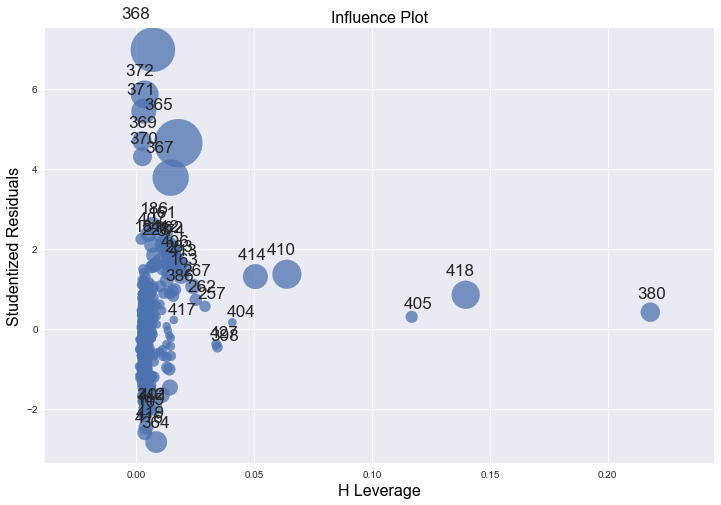

In [63]:
# Leverage plot
lm1 = sm.OLS(y, X).fit()
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm1, alpha  = 0.05, ax = ax, criterion="cooks")

In [64]:
# Check the outliers
outliers = [380, 368, 372, 371, 365, 369, 370, 367, 364]
bos.loc[outliers, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,LOGPRICE
380,88.97620,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4,2.341806
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,3.912023
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0,3.912023
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,3.912023
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,3.314186
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0,3.912023
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,3.912023
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,3.139833
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,3.086487


In [65]:
# Prediction vlaues of outliers
preds[outliers]

array([ 8.44661231, 10.69121824, 16.69062242, 19.01269069,  0.35978301,
       23.17986181, 25.46233464,  0.77683379, 39.10277947])

In [66]:
#### New datset removing outliers
outliers = [380, 368, 372, 371, 365, 369, 370, 367, 364]
bos_1 = bos.drop(outliers, axis = 0)
m = ols('PRICE ~ CRIM + RM + PTRATIO', bos_1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     434.8
Date:                Mon, 20 Aug 2018   Prob (F-statistic):          4.99e-138
Time:                        07:57:05   Log-Likelihood:                -1466.2
No. Observations:                 497   AIC:                             2940.
Df Residuals:                     493   BIC:                             2957.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3565      3.308     -2.526      0.0

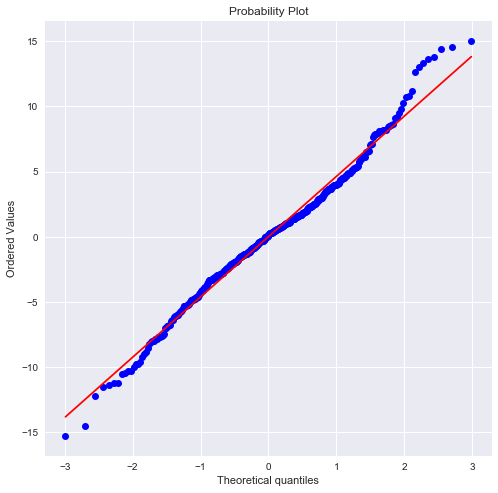

In [67]:
# Fit a model using scikit-learn
X = bos_1[['CRIM', 'RM', 'PTRATIO']]
y = bos_1.PRICE

lm = LinearRegression()
lm.fit(X, y)

# Residual plot
preds = lm.predict(X)
residuals = y - preds

# Quantile plot of residuals
f, ax = plt.subplots(figsize = (8, 8))
stats.probplot(residuals, dist = 'norm', plot = pylab)
plt.show()

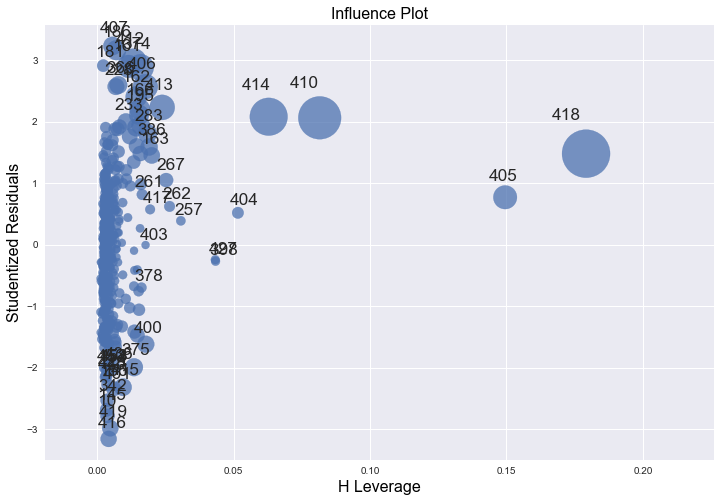

In [68]:
# Leverage plot
lm1 = sm.OLS(y, X).fit()
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm1, alpha  = 0.05, ax = ax, criterion="cooks")